# Assignment 1: Principal Component Analysis
Karla Aniela Cepeda Zapata<br/>
Time Series Analysis<br/>
D00242569

## Q4
Load the “BodyFat” csv file from Moodle in to Python. The body fat data of consists of observations taken on a sample of 252 males. The following variables were measured:
* Percent body fat
* Age (years)
* Weight (pounds)
* Height (inches) 
* Neck circumference (cm) 
* Abdomen circumference (cm) 
* Knee circumference (cm) 
* Ankle circumference (cm)

##### Before starting....

In [1]:
# SETUP ENVIRONMENT
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats 
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.cluster import KMeans

os.chdir(r'E:\Karla\IRELAND v2\DKIT\2nd Semester\Time Series Analysis\CA\CA1')

pd.set_option('display.max_columns', None)

In [2]:
# Title for graphs
data_title = "Bodyfat"

In [3]:
data = pd.read_csv('datasets/Bodyfat.csv')

In [4]:
# Change name of columns
data.columns = list(map(lambda s: s.lower().strip(), data.columns))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   age      252 non-null    int64  
 3   weight   252 non-null    float64
 4   height   252 non-null    float64
 5   neck     252 non-null    float64
 6   abdomen  252 non-null    float64
 7   knee     252 non-null    float64
 8   ankle    252 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 17.8 KB


There are no misssing values. Let's explore the data.

In [6]:
data.describe()

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,92.555952,38.590476,23.102381
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,10.783077,2.411805,1.694893
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,69.400000,33.000000,19.100000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,84.575000,36.975000,22.000000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,90.950000,38.500000,22.800000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,99.325000,39.925000,24.000000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,148.100000,49.100000,33.900000


It is interesting that there are observations with bodyfat=0, which is impossible. Let's explore these observations.

In [7]:
data[data['bodyfat']==0]

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
181,1.1089,0.0,40,118.5,68.0,33.8,69.4,33.5,20.2


It seems there is just one observation with bodyfat==0. I computed the bodyfat for this observation on https://www.calculator.net/body-fat-calculator.html and got the value 7.4%.

In [8]:
data.loc[181, 'bodyfat'] = 7.4

In [9]:
data.iloc[181]

density      1.1089
bodyfat      7.4000
age         40.0000
weight     118.5000
height      68.0000
neck        33.8000
abdomen     69.4000
knee        33.5000
ankle       20.2000
Name: 181, dtype: float64

In [10]:
data.describe()

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.180159,44.884921,178.924405,70.148810,37.992063,92.555952,38.590476,23.102381
std,0.019031,8.314079,12.602040,29.389160,3.662856,2.430913,10.783077,2.411805,1.694893
min,0.995000,0.700000,22.000000,118.500000,29.500000,31.100000,69.400000,33.000000,19.100000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,84.575000,36.975000,22.000000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,90.950000,38.500000,22.800000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,99.325000,39.925000,24.000000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,148.100000,49.100000,33.900000


After checking out again the statistic summary, now the min value of bodyfat is 0.7%. It is a very low value, so I am going to calculate this value in the same source as previously and update the value.

In [11]:
data[data['bodyfat'] == 0.7]

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
171,1.0983,0.7,35,125.75,65.5,34.0,75.0,34.8,22.0


In [12]:
data.loc[171,'bodyfat'] = 13.5

In [13]:
data.iloc[171]

density      1.0983
bodyfat     13.5000
age         35.0000
weight     125.7500
height      65.5000
neck        34.0000
abdomen     75.0000
knee        34.8000
ankle       22.0000
Name: 171, dtype: float64

In [14]:
data.describe()

,density,bodyfat,age,weight,height,neck,abdomen,knee,ankle
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.230952,44.884921,178.924405,70.148810,37.992063,92.555952,38.590476,23.102381
std,0.019031,8.239493,12.602040,29.389160,3.662856,2.430913,10.783077,2.411805,1.694893
min,0.995000,3.000000,22.000000,118.500000,29.500000,31.100000,69.400000,33.000000,19.100000
25%,1.041400,12.500000,35.750000,159.000000,68.250000,36.400000,84.575000,36.975000,22.000000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,90.950000,38.500000,22.800000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,99.325000,39.925000,24.000000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,148.100000,49.100000,33.900000


For me this looks better.

##### Methods

In [15]:
def scale_data(df, graph=False):
    
    """
        Scale data
    
    """
    # Now, I am going to scale the values. 
    scaler = StandardScaler()
    std_df = scaler.fit_transform(df)
    
    if graph:
        # The box plot shows how the scaled data is located.
        sns.boxplot(data=pd.DataFrame(std_df, columns=df.columns, index=df.index))
        plt.title(data_title + " - Centered and scaled to unit variance")
        plt.show()
    
    return std_df
    

In [16]:
def compute_pca(df, std_df, num_comp=None):
    
    """
    
    """
    
    # Since the question is just asking for the first two principal components, I am going to create this two.
    if num_comp==None:
        num_comp = std_df.shape[1]
    
    pca = PCA(n_components=num_comp)
    pca.fit(std_df)

    # I am going to create a DataFrame to improve visualization of the PC1 and PC2
    col_PCs = ['PC' + str(x) for x in range(1, pca.n_components_+1)]
    PCs = pd.DataFrame(pca.components_.T, columns=col_PCs, index=df.columns)
    
    return (pca, PCs, col_PCs)

In [17]:
def plot_barGraphPC(df, namePC='PC1', draw_average=False):
    """
        Graph barplot
        
        Arguments:
         df = DataFrame which contains Princpal Components
         namePC = Name of PC which is going to be plotted. By default plots PC1.
        
    """
    
    ylim = 0
    addedlim = 0.25
    
    av_weight = math.sqrt(1/df.shape[1])
    
    negative_data = df.copy()
    positive_data = df.copy()

    negative_data.loc[negative_data[namePC]>0, namePC]=0
    positive_data.loc[positive_data[namePC]<0, namePC]=0
        
    if positive_data[namePC].max() > abs(negative_data[namePC].min()):
        ylim = positive_data[namePC].max()+addedlim        
    else:
        ylim = abs(negative_data[namePC].min())+addedlim
        
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.bar(negative_data.index,negative_data[namePC], width=1, edgecolor='k', color='None')
    ax.bar(negative_data.index,positive_data[namePC], width=1, edgecolor='k', color='None')
    plt.axhline(0, color='k', linewidth=0.5)
    plt.ylabel(namePC + " component loadings")
    plt.ylim(-ylim, ylim)
    
    if draw_average:
        plt.axhline(y=av_weight, linewidth=0.5, color='r')
        plt.axhline(y=(-av_weight), linewidth=0.5, color='r')
    
    plt.title(data_title + " - " + namePC + " loadings")
    plt.show()
    
    print("Average loading contribution:", round(av_weight,2))
    
    df_avw = df[[namePC]].copy()
    df_avw['above_average'] = np.where(abs(df_avw[namePC]) > av_weight,'x','')
    return df_avw.sort_values(by=['above_average', namePC], ascending=False)
    

In [18]:
def plot_screeGraph(pca, cumulative=False):
    """
        Scree Plot
        
        Arguments:
            PC = pca object.
            cumulative = if % shown as cumulative or not.
        
    """
    
    PCs_exp = None
    col_PCs = ['PC' + str(x) for x in range(1, pca.n_components_+1)]
        
    if cumulative:
        PCs_exp = pd.Series(pca.explained_variance_ratio_.cumsum(), index=col_PCs)
    else:
        PCs_exp = pd.Series(pca.explained_variance_ratio_, index=col_PCs)
    
    fig, ax = plt.subplots()
    plt.bar(PCs_exp.index, height=PCs_exp)
    plt.title(data_title + " - Scree Plot")
    plt.ylabel("% Variance Explained")
    plt.show()

    fig, ax = plt.subplots()
    plt.plot(PCs_exp)
    plt.title(data_title + " - Scree Plot")
    plt.ylabel("% Variance Explained")
    plt.show()
            
    return PCs_exp
    

## Section A
Carry out a principal component analysis of the variables neck, abdomen, knee and ankle.

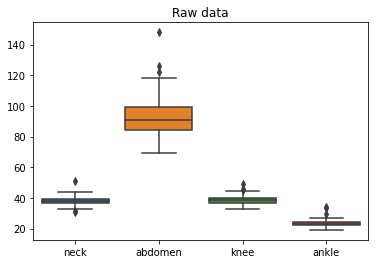

In [19]:
# Select columns that I am interested in and create new variable.
cols = ['neck', 'abdomen', 'knee', 'ankle']
bfat = data[cols].copy()

# Ploting the raw data location.
sns.boxplot(data=bfat)
plt.title("Raw data")
plt.show()

##### Scaling

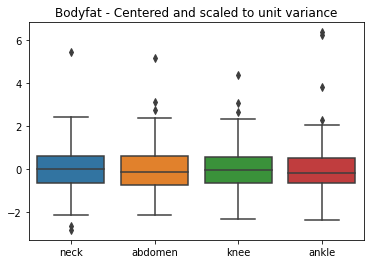

In [20]:
std_bfat = scale_data(bfat, True)

##### Principal Components

In [21]:
pca_fit, PCs_bfat, col_PCs = compute_pca(bfat, std_bfat)

In [22]:
PCs_bfat

,PC1,PC2,PC3,PC4
neck,0.511495,-0.355366,-0.683611,-0.380478
abdomen,0.520551,-0.401773,0.193023,0.728249
knee,0.530718,0.052545,0.662521,-0.525969
ankle,0.430973,0.842337,-0.237663,0.219649


##### First Principal Component

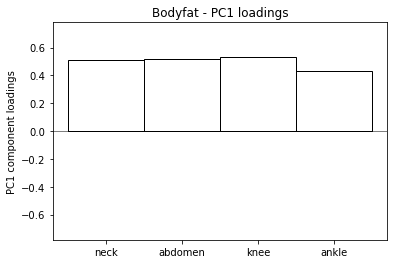

Average loading contribution: 0.5


,PC1,above_average
knee,0.530718,x
abdomen,0.520551,x
neck,0.511495,x
ankle,0.430973,


In [23]:
plot_barGraphPC(PCs_bfat)

##### Second Principal Component

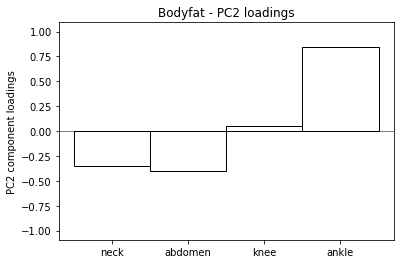

Average loading contribution: 0.5


,PC2,above_average
ankle,0.842337,x
knee,0.052545,
neck,-0.355366,
abdomen,-0.401773,


In [24]:
plot_barGraphPC(PCs_bfat, 'PC2')

##### Ploting Explained Variance

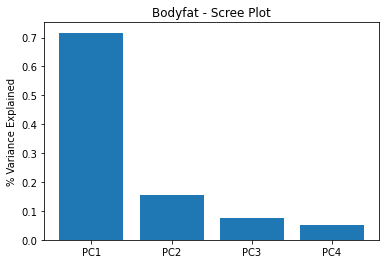

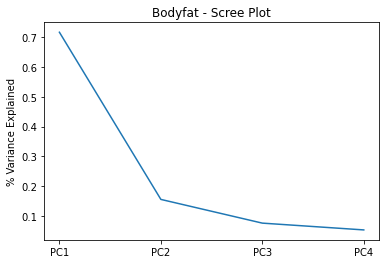

PC1    0.716941
PC2    0.155091
PC3    0.075391
PC4    0.052577
dtype: float64

In [25]:
plot_screeGraph(pca_fit)

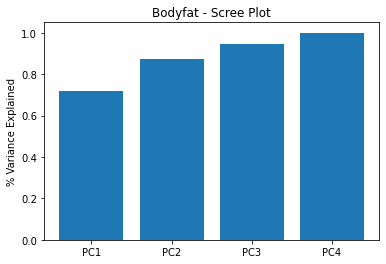

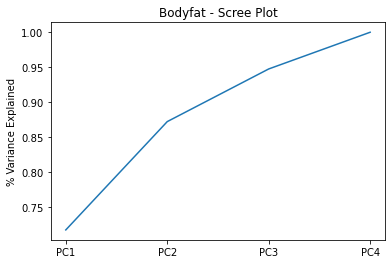

PC1    0.716941
PC2    0.872032
PC3    0.947423
PC4    1.000000
dtype: float64

In [26]:
plot_screeGraph(pca_fit, True)

##### Plotting PC1 and PC2

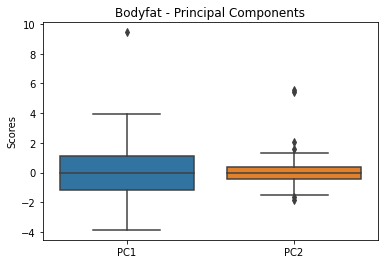

In [27]:
# Plot PC1 and PC2 in boxplot
ft_bfat=pd.DataFrame(pca_fit.transform(std_bfat), columns=col_PCs)

sns.boxplot(data=ft_bfat.iloc[:,:2])
plt.ylabel("Scores")
plt.title(data_title + " - Principal Components")
plt.show()

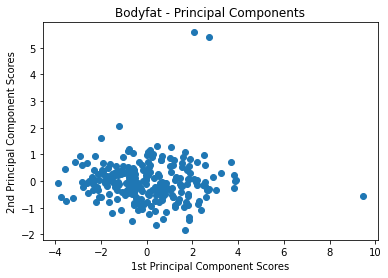

In [28]:
# Plot PC1 and PC2 in scatterplot
fig, ax = plt.subplots()
plt.scatter(ft_bfat.loc[:,"PC1"], ft_bfat.loc[:,"PC2"])
plt.ylabel("2nd Principal Component Scores")
plt.xlabel("1st Principal Component Scores")
plt.title(data_title + " - Principal Components")
plt.show()

In [29]:
# Identify outliers
for c in ['PC1', 'PC2']:
    outliers = [round(stat,2) for stat in boxplot_stats(ft_bfat[c])[0]['fliers']]
    print(str(len(outliers)) +" outliers in " + c + ":", outliers)

1 outliers in PC1: [9.44]
6 outliers in PC2: [-1.83, -1.67, 5.42, 5.59, 2.06, 1.62]


## Section B
Omitting any outliers identified in part a), carry out a principal components analysis of the variables neck, abdomen, knee and ankle.

In [30]:
# Create a new DataFrame which contains variables neck abdomen, knee, ankle and all PCs
bfat_b = pd.concat([bfat, ft_bfat], axis=1)
bfat_b

,neck,abdomen,knee,ankle,PC1,PC2,PC3,PC4
0,36.2,85.2,37.3,21.9,-1.324519,-0.089805,0.186761,-0.090881
1,38.5,83.0,37.3,23.4,-0.563847,0.402394,-0.711535,-0.405682
2,34.0,87.9,38.9,24.0,-0.769920,1.212318,1.000433,0.359919
3,37.4,86.4,37.3,22.8,-0.784171,0.137800,-0.256298,-0.081002
4,34.4,100.0,42.2,24.0,0.627312,0.774028,2.013062,0.394903
...,...,...,...,...,...,...,...,...
247,34.9,83.6,34.8,21.5,-2.329127,-0.093415,-0.107542,0.499069
248,40.9,105.0,40.8,23.2,1.727059,-0.793684,-0.001740,-0.084087
249,38.9,111.5,37.3,21.5,0.414967,-1.666360,-0.046111,1.213482
250,38.9,101.3,41.6,22.7,1.175423,-0.594118,0.785895,-0.260551


In [31]:
# Remove outliers
for c in ['PC1', 'PC2']:
    outliers = [stat for stat in boxplot_stats(bfat_b[c])[0]['fliers']]
    bfat_b.drop(index=bfat_b[bfat_b[c].isin(outliers)].index.values, inplace=True)
    print(str(len(outliers))+" outliers removed.", c, outliers)


1 outliers removed. PC1 [9.444073147399434]
6 outliers removed. PC2 [-1.834033297677378, -1.66636004797309, 5.419591139081526, 5.585265243880325, 2.0600648759719897, 1.6159726061121604]


In [32]:
# Remove PCs columns
bfat_b.drop(columns=col_PCs, inplace=True)
bfat_b

,neck,abdomen,knee,ankle
0,36.2,85.2,37.3,21.9
1,38.5,83.0,37.3,23.4
2,34.0,87.9,38.9,24.0
3,37.4,86.4,37.3,22.8
4,34.4,100.0,42.2,24.0
...,...,...,...,...
246,40.8,107.6,44.0,22.6
247,34.9,83.6,34.8,21.5
248,40.9,105.0,40.8,23.2
250,38.9,101.3,41.6,22.7


##### Scaling

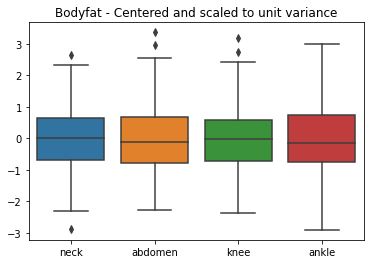

In [33]:
std_bfat_b = scale_data(bfat_b, True)

##### Principal Component Analysis

In [34]:
pca_fit_b, PCs_bfat_b, col_PCs = compute_pca(bfat_b, std_bfat_b)

In [35]:
PCs_bfat_b

,PC1,PC2,PC3,PC4
neck,0.495000,0.465524,-0.685214,-0.262191
abdomen,0.503594,0.473009,0.477423,0.542883
knee,0.520600,-0.250349,0.463184,-0.672132
ankle,0.479941,-0.704894,-0.296663,0.429852


##### First Principal Component 

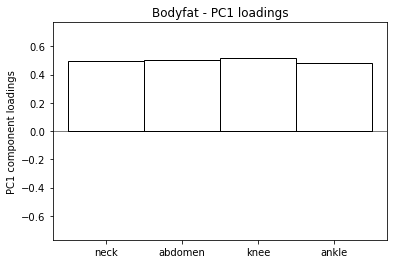

Average loading contribution: 0.5


,PC1,above_average
knee,0.520600,x
abdomen,0.503594,x
neck,0.495000,
ankle,0.479941,


In [36]:
plot_barGraphPC(PCs_bfat_b,'PC1')

##### Second Principal Component

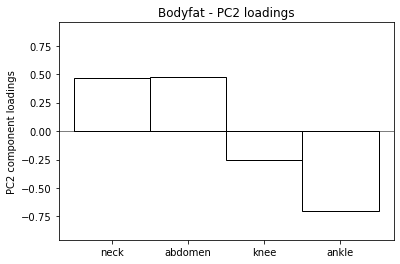

Average loading contribution: 0.5


,PC2,above_average
ankle,-0.704894,x
abdomen,0.473009,
neck,0.465524,
knee,-0.250349,


In [37]:
plot_barGraphPC(PCs_bfat_b,'PC2')

##### Ploting Explained Variance

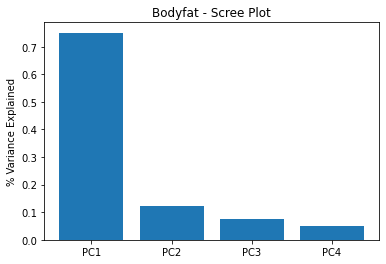

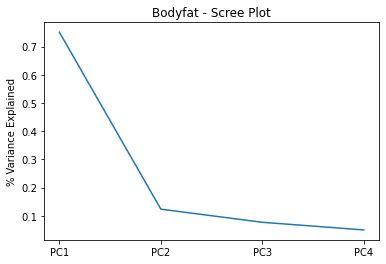

PC1    0.750688
PC2    0.123136
PC3    0.076611
PC4    0.049565
dtype: float64

In [38]:
plot_screeGraph(pca_fit_b)

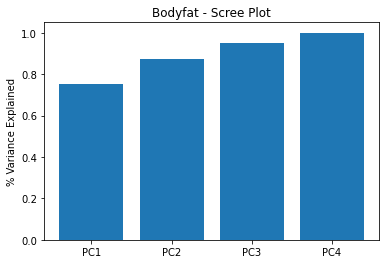

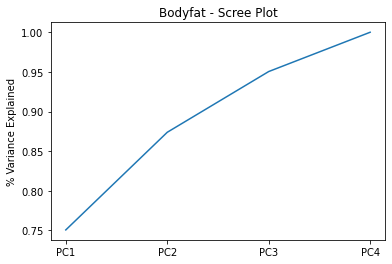

PC1    0.750688
PC2    0.873824
PC3    0.950435
PC4    1.000000
dtype: float64

In [39]:
plot_screeGraph(pca_fit_b, True)

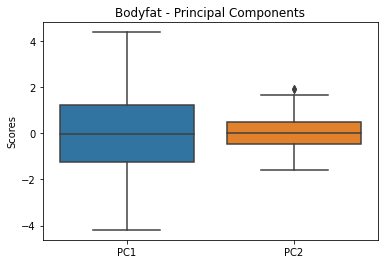

In [40]:
ft_bfat_b=pd.DataFrame(pca_fit_b.transform(std_bfat_b), columns=col_PCs)

sns.boxplot(data=ft_bfat_b.iloc[:,:2])
plt.ylabel("Scores")
plt.title(data_title + " - Principal Components")
plt.show()

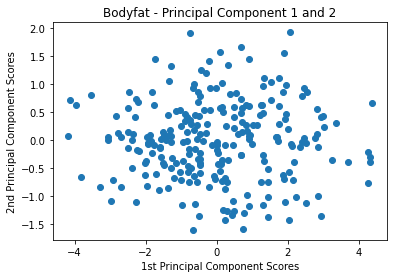

In [41]:
# Plot PC1 and PC2 in scatterplot
fig, ax = plt.subplots()
plt.scatter(ft_bfat_b.loc[:,"PC1"], ft_bfat_b.loc[:,"PC2"])
plt.ylabel("2nd Principal Component Scores")
plt.xlabel("1st Principal Component Scores")
plt.title(data_title + " - Principal Component 1 and 2")
plt.show()